## IMDB datset data analysis
This is a simple data analysis project using IMDB dataset from Kaggle

### Import Library and Get data from the included CSV file

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
imdb_dataset = pd.read_csv("./data/imdb_top_1000.csv")

In [4]:
imdb_dataset.shape

(1000, 16)

In [5]:
imdb_dataset.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [6]:
imdb_dataset.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


### Checking data for null value and fix them if necessary
Checking the data for null value and either replace them with blank for string data or 0 for numerical data

In [7]:
print(imdb_dataset.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [8]:
imdb_dataset["Certificate"] = imdb_dataset["Certificate"].fillna("")

In [9]:
print(imdb_dataset.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [10]:
imdb_dataset["Meta_score"] = imdb_dataset["Meta_score"].fillna(imdb_dataset["Meta_score"].median())
imdb_dataset["Gross"].dtypes

dtype('O')

In [11]:
print(imdb_dataset.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [12]:
imdb_dataset["Gross"] = imdb_dataset["Gross"].str.replace(",","")
imdb_dataset["Gross"] = imdb_dataset["Gross"].fillna(0)

In [32]:
imdb_dataset.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [14]:
imdb_dataset["Gross"] = imdb_dataset["Gross"].astype(int)

In [15]:
imdb_dataset["Gross"].dtype

dtype('int64')

In [16]:
corr_imdb_dataset = imdb_dataset.select_dtypes(include=["number"])

## Find data correlation

In [17]:
corr_imdb_dataset.corr()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.258650,0.494979,0.082381
Meta_score,0.258650,1.000000,-0.026940,-0.059695
No_of_Votes,0.494979,-0.026940,1.000000,0.602128
Gross,0.082381,-0.059695,0.602128,1.000000


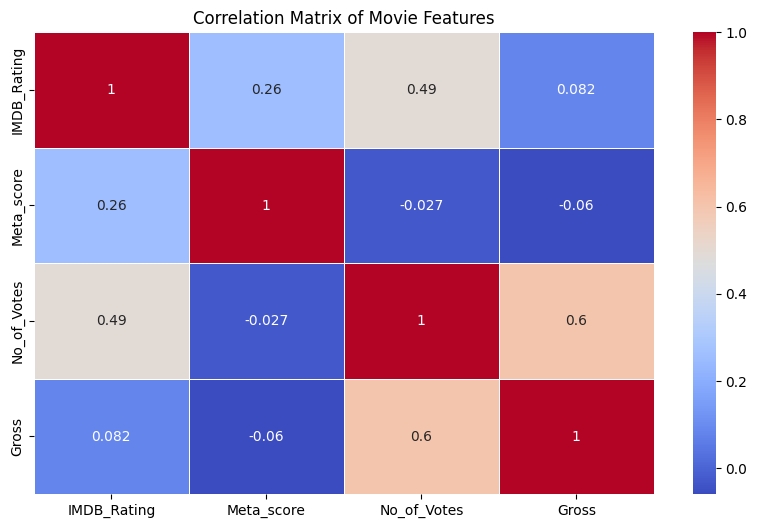

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_imdb_dataset.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Movie Features")
plt.show()

There is some correlation between IMDB ratings and Number of Votes at 0.49, and high correlation between Number of Votes and Gross at 0.6. On the other hand, the other are really low at 0.26 for Meta score and 0.082 for Gross. And none of the other have any form of correlation higher than 0.4.

array([[<Axes: title={'center': 'IMDB_Rating'}>,
        <Axes: title={'center': 'Meta_score'}>],
       [<Axes: title={'center': 'No_of_Votes'}>,
        <Axes: title={'center': 'Gross'}>]], dtype=object)

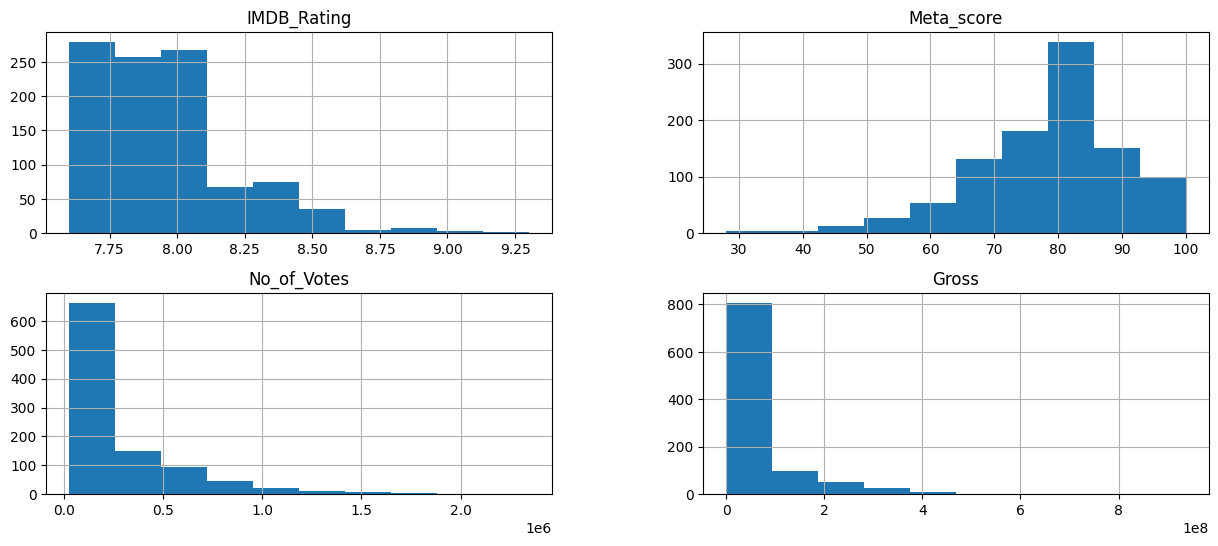

In [19]:
corr_imdb_dataset.hist(figsize= (15,6))

The distribution is not balanced since this is just an IMDB datset for the top 100 movies. Gross have 0 as the most frequent data because it is filled in for null value in Gross collumn.

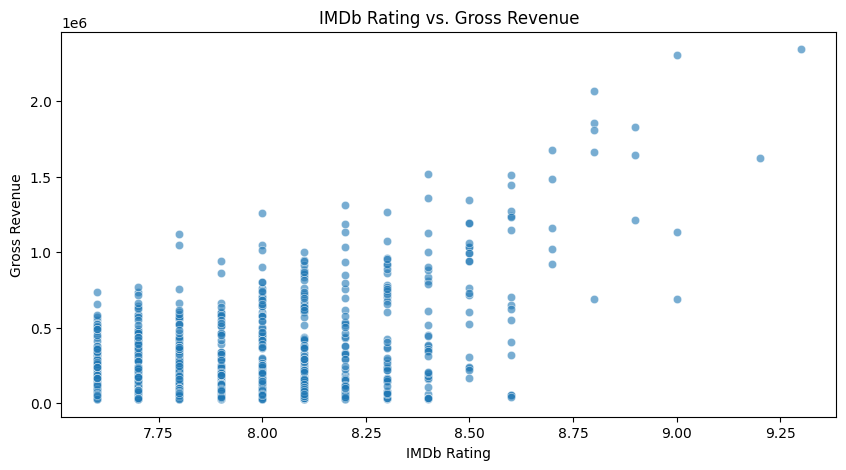

In [21]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=imdb_dataset["IMDB_Rating"], y=imdb_dataset["No_of_Votes"], alpha=0.6)
plt.xlabel("IMDb Rating")
plt.ylabel("Gross Revenue")
plt.title("IMDb Rating vs. Gross Revenue")
plt.show()

<Axes: title={'center': 'Most voted movie'}, xlabel='Series_Title', ylabel='No_of_Votes'>

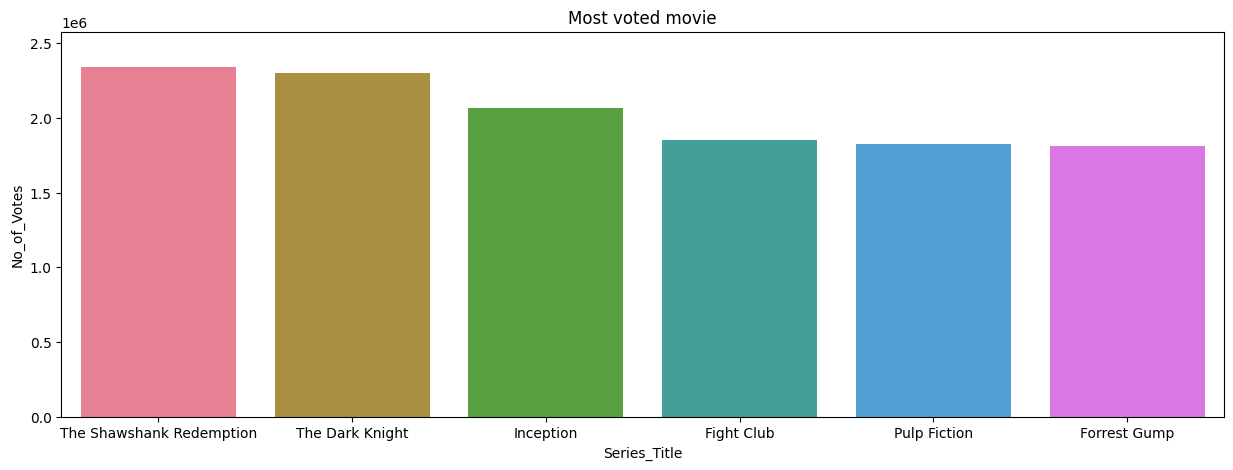

In [29]:
top_voted = imdb_dataset.sort_values(["No_of_Votes"], ascending = False)

fig,axs=plt.subplots(figsize=(15,5))
plt.title("Most voted movie")
plt.ylim(0, max(top_voted["No_of_Votes"][:6]) * 1.1)
sns.barplot(x=top_voted["Series_Title"][:6], y=top_voted["No_of_Votes"][:6], hue=top_voted["Series_Title"][:6], palette= "husl")

The movie with the most vote is "The Shawshank Redemption" followed by "The Dark Knight", "Inception", "Fight Club", "Pulp Fiction", "Forrest Gump". These are the top 6 highest voted movie among the top 1000 in IMDB

<Axes: title={'center': 'Top Meta Score'}, xlabel='Series_Title', ylabel='Meta_score'>

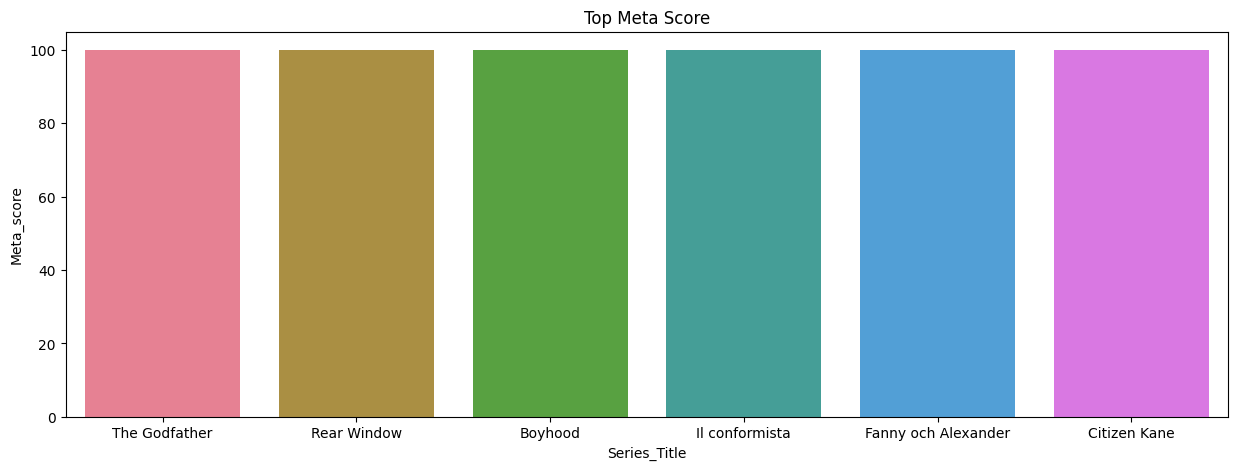

In [31]:
meta_score_vote = imdb_dataset.sort_values(["Meta_score"], ascending=False)
fig,axs=plt.subplots(figsize=(15,5))
plt.title("Top Meta Score")
sns.barplot(x=meta_score_vote["Series_Title"][:6], y=meta_score_vote["Meta_score"][:6], hue=meta_score_vote["Series_Title"][:6], palette= "husl")


These are the top 6 movies based on the meta score instead of IMDB rating.

#### A pie chart to show the distribution of genre within the top 1000 movies


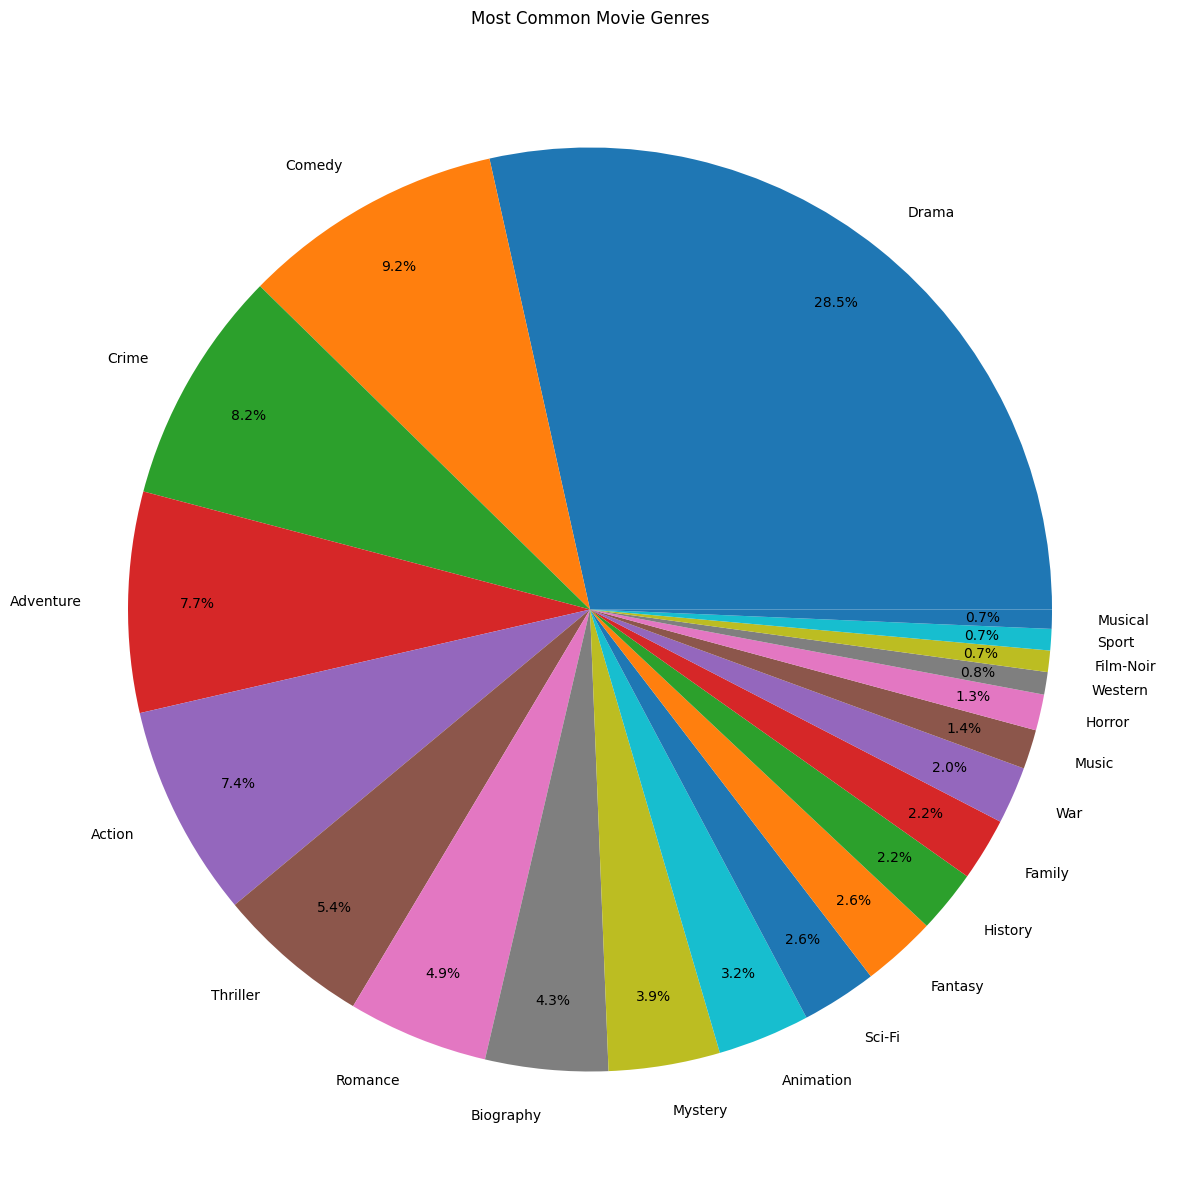

In [24]:
from collections import Counter
genre_split = imdb_dataset["Genre"].str.split(", ")

all_genre = []

for sub_list in genre_split:
    for genre in sub_list:
        all_genre.append(genre)

genre_counts = Counter(all_genre)

# Convert to DataFrame for visualization
genre_df = pd.DataFrame.from_dict(genre_counts, orient="index", columns=["Count"]).reset_index()
genre_df.rename(columns={"index": "Genre"}, inplace=True)
genre_df = genre_df.sort_values(["Count"], ascending=False)
plt.figure(figsize=(15,15))
plt.pie(x=genre_df["Count"], labels=genre_df["Genre"],autopct="%1.1f%%",pctdistance=0.85)
plt.title("Most Common Movie Genres")
plt.show()

As seen through the chart, the most popular genre was Drama(28.5%) followed by Comedy(9.2%) and Crime(8.2%)

In [33]:
star_list = list(imdb_dataset["Star1"]) + list(imdb_dataset["Star2"]) + list(imdb_dataset["Star3"])
star_counts = Counter(star_list)

star_df = pd.DataFrame.from_dict(star_counts, orient="index", columns=["Count"]).reset_index()
star_df.rename(columns={"index": "Actor"}, inplace=True)

# Show top 10 most frequently appearing actors
star_df = star_df.sort_values(by="Count", ascending=False)

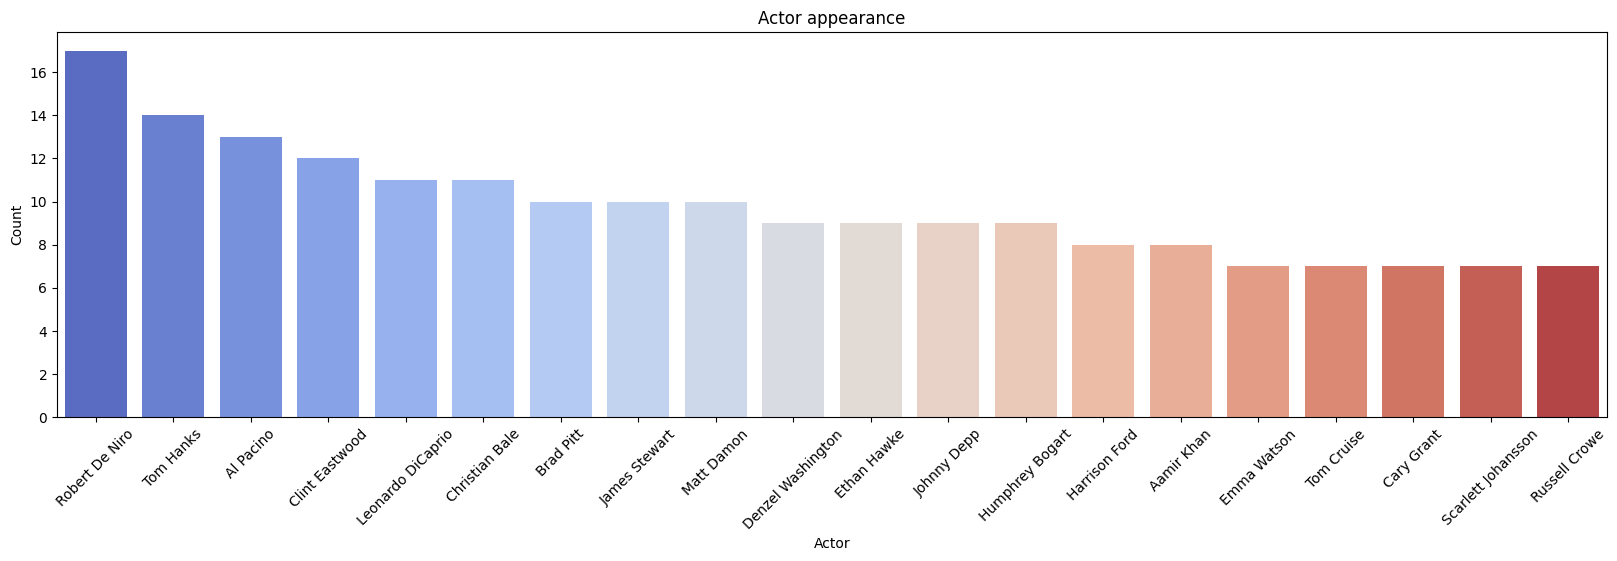

In [34]:
plt.figure(figsize=(20,5))
sns.barplot(x=star_df["Actor"][:20], y=star_df["Count"][:20], hue = star_df["Actor"][:20], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Actor appearance")
plt.show()

Among the 1000 top rated movies in IMDB database, "Rober De Niro" appear 17 times follow by "Tom Hank" at 14 and "Al Pacino" at 13.